In [20]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

nPaths = 1000
'''
----------------------------------------
Black Scholes model for european options
----------------------------------------
'''
def BS_path(S_0, r, sigma, T, nSteps):
    """
    Returns [nPaths, nSteps] matrix of nPaths paths of stock price following Black Scholes Model.
    :int T: Number of years the simulation lasts
    """
    delta_i = T/nSteps
    X = np.zeros((nPaths, nSteps+1))      #Create a null matrix of size nPaths, nSteps
    X[:,0] = S_0                          #Set entries on first column to S_0

    for i in range(nSteps):
        #for each step of the simulation, obtain n = nPath normally distributed random numbers
        Z = stats.norm.rvs(size = (nPaths))    
        #add to the result matrix the simulated price at time x + DeltaT according to BS model
        X[:,i+1] = X[:,i]*np.exp((r-0.5*(sigma**2))*(delta_i)+sigma*np.sqrt(delta_i)*Z)
    plt.plot(range(nSteps+1),X.T)
    plt.show()
    return X

def BS(S0, K, T, sigma, r, type):
    """
    S0 = stock price at first day
    K = strike
    T = time in years
    sigma = sigma
    r = risk free rate
    type = call/put
    """
    nSteps = int(np.ceil(T*252)) #Time steps with trading days
    X = BS_path(S0, r, sigma, T, nSteps)
    #S = np.mean(X[:,-1])
    
    if type == "puts":
        Price = np.mean(np.exp(-r*T)*np.maximum(0,K-X[:,-1]))
    elif type == "calls":
        Price = np.mean(np.exp(-r*T)*np.maximum(0,X[:,-1]-K))
    else:
        raise Exception("Unexpected input")
    return Price

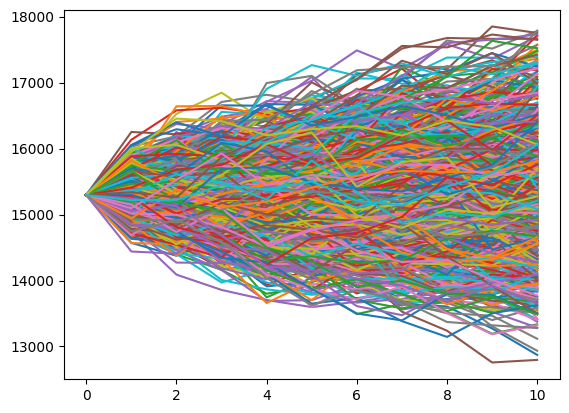

283.93758802615935

In [21]:
BS(15296, 15475,14/365,0.3,0.1,"calls")

In [32]:
def MertonJD(S0, r, sigma, T, nSteps, lamb = 0.25, a = 0.2, b = 0.2):
    '''
    ---------------------------
    Merton Jump Diffusion Model
    ---------------------------
    '''
    # T_vec, dt = np.linspace(0, T, nSteps+1, retstep = True)
    dt = T/nSteps
    S_arr = np.zeros([nPaths, nSteps+1])
    S_arr[:,0] = S0
    Z_1 = np.random.normal(size = (nPaths, nSteps))
    Z_2 = np.random.normal(size = (nPaths, nSteps))
    Pois = np.random.poisson(lamb*dt, (nPaths, nSteps))
    for i in range(nSteps):
        S_arr[:,i+1] = S_arr[:,i]*np.exp((r - sigma**2/2)*dt + sigma*np.sqrt(dt) * Z_1[:,i] + a*Pois[:,i] + b * np.sqrt(Pois[:,i]) * Z_2[:,i])
    plt.plot(S_arr[1])
    return S_arr

def MJD(S0, K, T, sigma, r, type):
    """
    S0 = stock price at first day
    K = strike
    T = time in years
    sigma = sigma
    r = risk free rate
    type = call/put
    """
    nSteps = int(np.ceil(T*252)) #Time steps with trading days
    X = MertonJD(S0, r, sigma, T, nSteps)
    S = np.mean(X[:,-1])
    if type == "puts":
        price = np.exp(-r*T)*max(0,K-S)
    elif type == "calls":
        price = np.exp(-r*T)*max(0,S-K)
    else:
        raise Exception("Unexpected input")
    
    return price

In [15]:
MJD(15296, 15475,14/365,0.5,0.07,"calls")

NameError: name 'MJD' is not defined